In [10]:
from crawl import fetch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import jieba
plt.rcParams['font.family'] = ['Heiti TC']

In [4]:
page_num = 10
for i in range(page_num):
    article = fetch(i)
arti_data = pd.DataFrame(article)

In [5]:
arti_data

,title,content,forum
0,EX90 搶頭香，Volvo 和 Google 擴大合作要把 Gemini AI 助理帶到車上,Google 的 Gemini AI 助理要進駐到 Volvo 車上了。日前舉辦的 2025...,Volvo
1,陸續退出各地市場，Lexus 售價最親民純電車 UX300e 預計明年停產,Lexus 於 2021 年在台灣推出品牌首款純電車 UX300e，雖然售價一路從 169....,Lexus
2,從 Q4 e-tron 車聚看 Audi 電動車社群力：活動回顧、品牌觀察一次看懂,上個月 DDCAR 受邀前往雲林參與一場由車主自辦的 Audi Q4 e-tron 電動車車...,Audi
3,前鏡頭、氣氛燈還有新車色！特斯拉 Model S、Model X 改款細節搶先曝光,特斯拉 Model S、Model X 的改款車型搶先在美國加州曝光了。從大量且完全沒有偽裝...,Tesla
4,EX90 搶頭香，Volvo 和 Google 擴大合作要把 Gemini AI 助理帶到車上,Google 的 Gemini AI 助理要進駐到 Volvo 車上了。日前舉辦的 2025...,Volvo
...,...,...,...
99,搶攻新能源車商機，2025 台北國際車用電子展 MSI 首秀超薄 DC 快充、EZgo 旅充,【消息來源/ MSI】\nMSI 微星科技積極佈局新能源應用，將於 4 月 23 日至 26...,綜合討論
100,離峰充電它最省！台泥儲能 NHOA.TCC 北部專屬 $499 EVPASS 月費包，每度下...,響應 2025 年世界地球日，電動車主很有感的「那個優惠」又回來了！台泥儲能 NHOA.TC...,綜合討論
101,從豪華車到智慧移動艙：Mercedes-Benz 25 年式電車登場，以滿滿數位科技回應車主...,隨著全新 25/25 年式 EQE、EQS 車系的車型發表，Mercedes-Benz 透過...,Mercedes-benz
102,限時加送購物金！JOWUA 這組轉接頭讓 TPC 規格 Model 3 車主也能用 CCS2 快充,台灣特斯拉最近宣布針對 TPC 規格的 Model 3，推出了官方的 ECU 改裝服務，讓 ...,Tesla


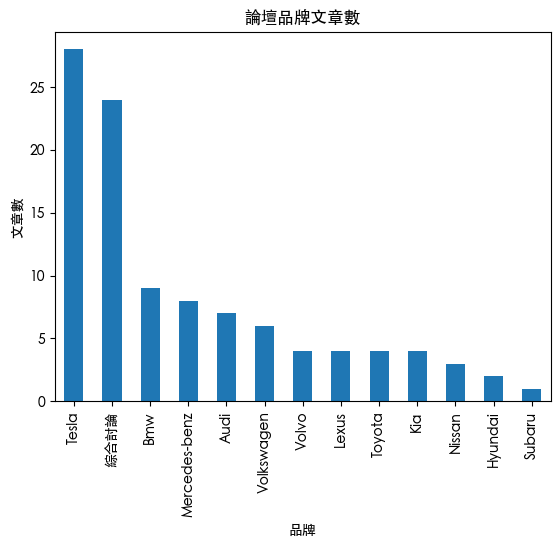

In [6]:
# 文章論壇品牌統計
forum_counts = arti_data['forum'].value_counts()
forum_counts.plot(kind='bar')
plt.title('論壇品牌文章數')
plt.xlabel('品牌')
plt.ylabel('文章數')
plt.show()


In [7]:
arti_data['forum'].unique()

array(['Volvo', 'Lexus', 'Audi', 'Tesla', 'Bmw', 'Nissan', 'Toyota',
       'Volkswagen', 'Mercedes-benz', '綜合討論', 'Kia', 'Subaru', 'Hyundai'],
      dtype=object)

In [31]:
# 文章品牌出現次數分析
brand_list = ['Volvo', 'Lexus', 'Audi', 'Tesla', 'BMW', 'Nissan', 'Toyota', 'Volkswagen', 'Mercedes-benz', 'Kia', 'Subaru', 'Hyundai']

brand_alias = {
    '特斯拉': 'Tesla',
    '賓士': 'Mercedes-benz',
    '福斯': 'Volkswagen',
    '寶馬': 'BMW',
    '凌志': 'Lexus',
    '富豪':'Volvo',
    '奧迪':'Audi',
    '豐田':'Toyota',
    '起亞':'Kia',
    '速霸陸': 'Subaru',
    '現代':'Hyundai'
    }



In [32]:
def count_brands(text, brand_list, brand_alias):
    words = jieba.lcut(text)
    counts = {brand: 0 for brand in brand_list}

    for w in words:
        if w in brand_alias:
            counts[brand_alias[w]] += 1
        elif w in counts:
            counts[w] += 1
    return counts

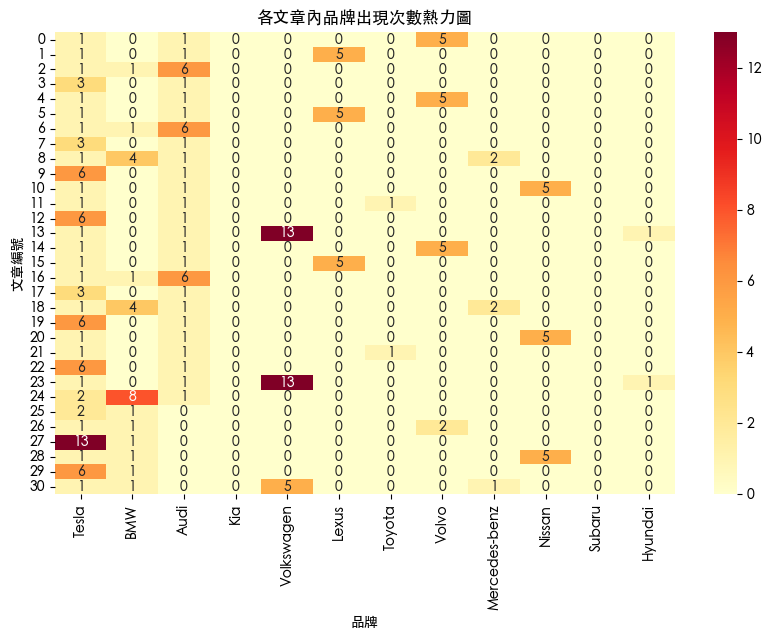

In [33]:
brand_counts_list = arti_data['content'].apply(lambda x: count_brands(x, brand_list, brand_alias))
brand_counts_df = pd.DataFrame(brand_counts_list.tolist())

import seaborn as sns
import matplotlib.pyplot as plt

# 品牌依總出現次數排序
brand_order = brand_counts_df.sum().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(brand_counts_df[brand_order][:31], annot=True, fmt="d", cmap="YlOrRd")
plt.title("各文章內品牌出現次數熱力圖")
plt.xlabel("品牌")
plt.ylabel("文章編號")
plt.show()


In [16]:
arti_data

,title,content,forum
0,EX90 搶頭香，Volvo 和 Google 擴大合作要把 Gemini AI 助理帶到車上,Google 的 Gemini AI 助理要進駐到 Volvo 車上了。日前舉辦的 2025...,Volvo
1,陸續退出各地市場，Lexus 售價最親民純電車 UX300e 預計明年停產,Lexus 於 2021 年在台灣推出品牌首款純電車 UX300e，雖然售價一路從 169....,Lexus
2,從 Q4 e-tron 車聚看 Audi 電動車社群力：活動回顧、品牌觀察一次看懂,上個月 DDCAR 受邀前往雲林參與一場由車主自辦的 Audi Q4 e-tron 電動車車...,Audi
3,前鏡頭、氣氛燈還有新車色！特斯拉 Model S、Model X 改款細節搶先曝光,特斯拉 Model S、Model X 的改款車型搶先在美國加州曝光了。從大量且完全沒有偽裝...,Tesla
4,EX90 搶頭香，Volvo 和 Google 擴大合作要把 Gemini AI 助理帶到車上,Google 的 Gemini AI 助理要進駐到 Volvo 車上了。日前舉辦的 2025...,Volvo
...,...,...,...
99,搶攻新能源車商機，2025 台北國際車用電子展 MSI 首秀超薄 DC 快充、EZgo 旅充,【消息來源/ MSI】\nMSI 微星科技積極佈局新能源應用，將於 4 月 23 日至 26...,綜合討論
100,離峰充電它最省！台泥儲能 NHOA.TCC 北部專屬 $499 EVPASS 月費包，每度下...,響應 2025 年世界地球日，電動車主很有感的「那個優惠」又回來了！台泥儲能 NHOA.TC...,綜合討論
101,從豪華車到智慧移動艙：Mercedes-Benz 25 年式電車登場，以滿滿數位科技回應車主...,隨著全新 25/25 年式 EQE、EQS 車系的車型發表，Mercedes-Benz 透過...,Mercedes-benz
102,限時加送購物金！JOWUA 這組轉接頭讓 TPC 規格 Model 3 車主也能用 CCS2 快充,台灣特斯拉最近宣布針對 TPC 規格的 Model 3，推出了官方的 ECU 改裝服務，讓 ...,Tesla


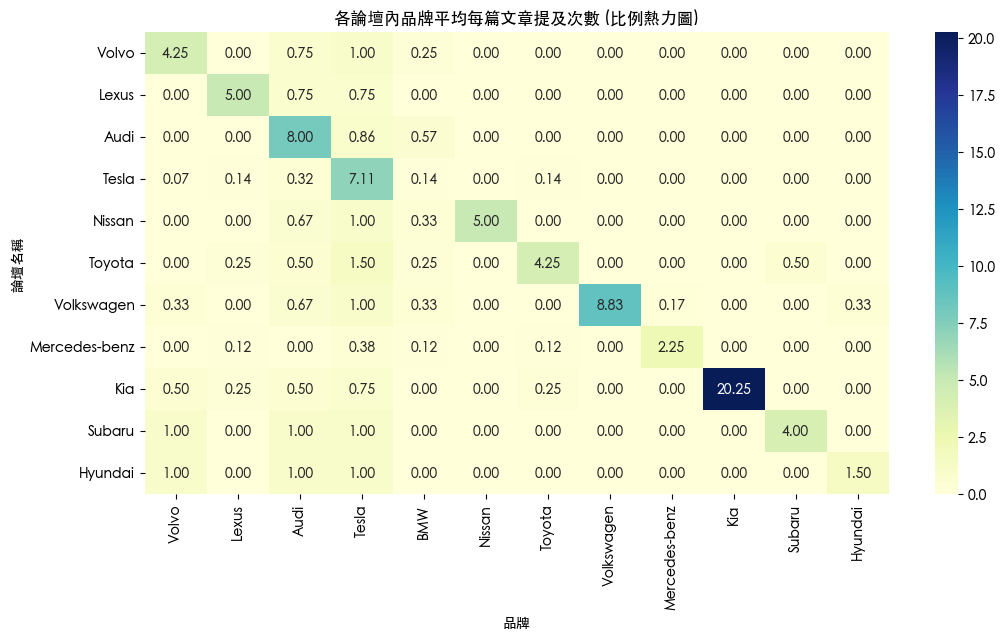

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 先用剛剛的方式算各論壇品牌出現總次數
forum_brand_counts = {}

for forum_name, group in arti_data.groupby('forum'):
    if forum_name == '綜合討論':
        continue
    all_text = ' '.join(group['content'].tolist())
    counts = count_brands(all_text, brand_list, brand_alias)
    forum_brand_counts[forum_name] = counts

forum_brand_counts_df = pd.DataFrame(forum_brand_counts).T

# 計算每個論壇文章數（排除綜合討論）
forum_article_counts = arti_data[arti_data['forum'] != '綜合討論'].groupby('forum').size()

# 除以文章數，得到平均每篇文章品牌出現次數
forum_brand_ratio = forum_brand_counts_df.div(forum_article_counts, axis=0)
forum_brand_ratio = forum_brand_ratio[brand_list]
common_forums = [f for f in brand_list if f in forum_brand_ratio.index]
forum_brand_ratio = forum_brand_ratio.loc[common_forums]


# 畫比例熱力圖
plt.figure(figsize=(12,6))
sns.heatmap(forum_brand_ratio, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("各論壇內品牌平均每篇文章提及次數 (比例熱力圖)")
plt.xlabel("品牌")
plt.ylabel("論壇名稱")
plt.show()


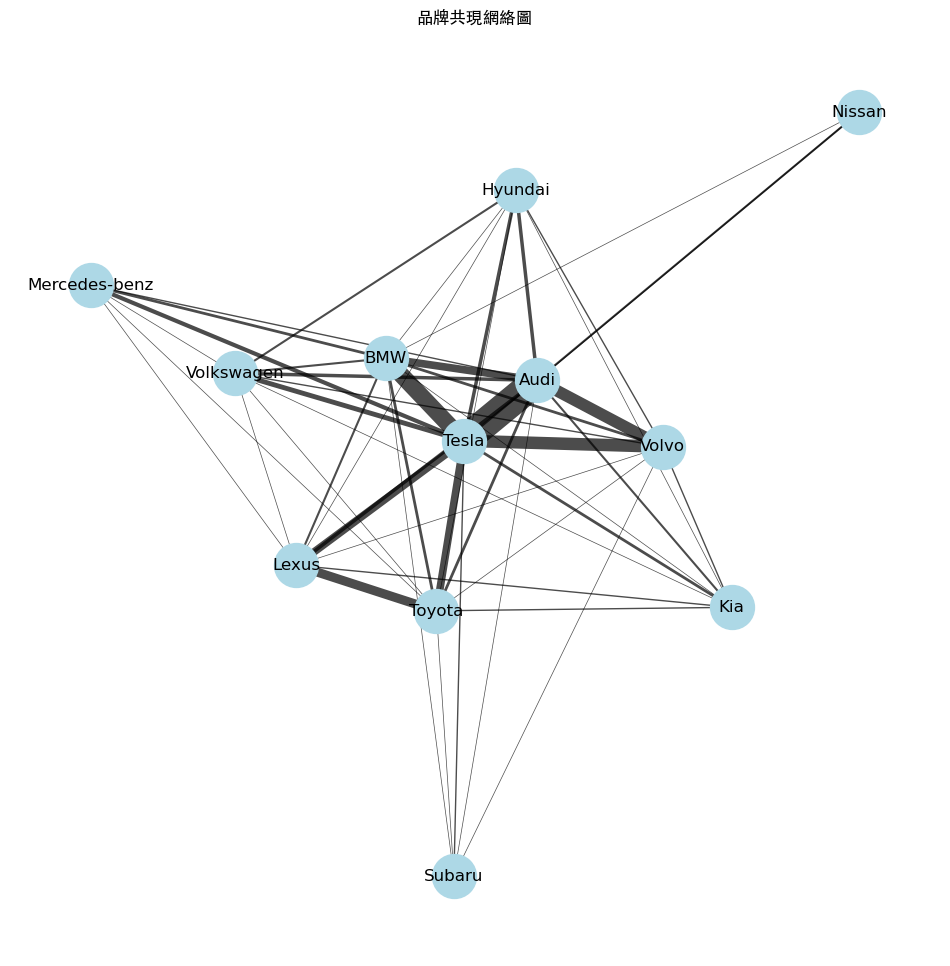

In [35]:
import networkx as nx

# 先計算每篇文章中出現的品牌（布林值）
def brands_in_article(text, brand_list, brand_alias):
    words = jieba.lcut(text)
    appeared = set()
    for w in words:
        if w in brand_alias:
            appeared.add(brand_alias[w])
        elif w in brand_list and w in brand_list:
            appeared.add(w)
    return list(appeared)

arti_data['brands_appeared'] = arti_data['content'].apply(lambda x: brands_in_article(x, brand_list, brand_alias))

# 初始化品牌共現計數矩陣
import itertools
import numpy as np

brand_indices = {brand:i for i, brand in enumerate(brand_list)}
cooccurrence = np.zeros((len(brand_list), len(brand_list)), dtype=int)

# 累計品牌共現次數
for brands in arti_data['brands_appeared']:
    for b1, b2 in itertools.combinations(sorted(set(brands)), 2):
        i, j = brand_indices[b1], brand_indices[b2]
        cooccurrence[i,j] += 1
        cooccurrence[j,i] += 1  # 無向圖共現

# 建圖
G = nx.Graph()
for i, brand in enumerate(brand_list):
    G.add_node(brand)

for i in range(len(brand_list)):
    for j in range(i+1, len(brand_list)):
        if cooccurrence[i,j] > 0:
            G.add_edge(brand_list[i], brand_list[j], weight=cooccurrence[i,j])

# 畫網絡圖
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5)  # k控制節點間距

# 邊權重對應粗細
edges = G.edges(data=True)
weights = [edata['weight'] for _,_,edata in edges]

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12)

nx.draw_networkx_edges(G, pos, width=[w/2 for w in weights], alpha=0.7)

plt.title("品牌共現網絡圖")
plt.axis('off')
plt.show()
